In [3]:
#import libraries
from urllib.request import urlopen
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact


In [6]:
#use openf1 api to get datasets from most recent session
response = urlopen('https://api.openf1.org/v1/car_data?driver_number=44&session_key=latest')
data = json.loads(response.read().decode('utf-8'))
HamiltonDf = pd.DataFrame(data)

response = urlopen('https://api.openf1.org/v1/car_data?driver_number=16&session_key=latest')
data = json.loads(response.read().decode('utf-8'))
LeClercDf = pd.DataFrame(data)

response = urlopen('https://api.openf1.org/v1/sessions?session_key=latest')
data = json.loads(response.read().decode('utf-8'))
RaceData = pd.DataFrame(data)

response = urlopen('https://api.openf1.org/v1/location?driver_number=44&session_key=latest')
data = json.loads(response.read().decode('utf-8'))
HamiltonLOC = pd.DataFrame(data)

response = urlopen('https://api.openf1.org/v1/location?driver_number=16&session_key=latest')
data = json.loads(response.read().decode('utf-8'))
LeClercLOC = pd.DataFrame(data)

In [7]:
#perform simple transformations to make dataset more usable
HamiltonDf['date'] = pd.to_datetime(HamiltonDf['date'], format='mixed')
LeClercDf['date'] = pd.to_datetime(LeClercDf['date'])
HamiltonLOC['date'] = pd.to_datetime(HamiltonLOC['date'], format='mixed')
LeClercLOC['date'] = pd.to_datetime(LeClercLOC['date'])

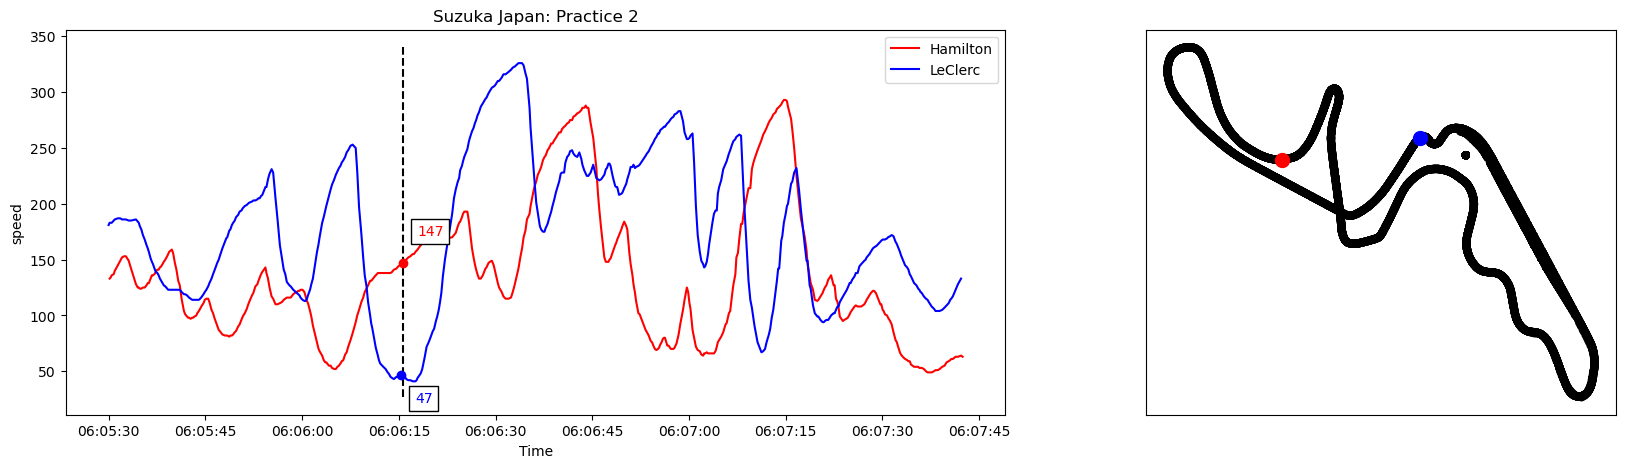

In [12]:
#static verison of plot for pdf view

mid = 3711
stat = 'speed'
time = -76

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5), width_ratios=[2,1])

sns.lineplot(HamiltonDf[(HamiltonDf.index >= (mid-250)) & (HamiltonDf.index <= (mid+250))], x='date', y=stat, color='r' ,ax=ax1, label='Hamilton')
sns.lineplot(LeClercDf[(LeClercDf.index >= (mid-250)) & (LeClercDf.index <= (mid+250))], x='date', y=stat, color='b' ,ax=ax1, label='LeClerc')
ymin, ymax = ax1.get_ylim()
ax1.vlines(x=HamiltonDf['date'].iloc[mid+time], ymin=ymin, ymax=ymax, color='#000000', linestyles='dashed')
ax1.plot(HamiltonDf['date'].iloc[mid+time], HamiltonDf[stat].iloc[mid+time], 'ro')
ax1.annotate(text= str(HamiltonDf[stat].iloc[mid+time]), xy= (HamiltonDf['date'].iloc[mid+time], HamiltonDf[stat].iloc[mid+time]), c='r', bbox = {'ec' :'#000000', 'fc' : '#FFFFFF'}, xytext=(10,20), textcoords='offset points')
ax1.plot(LeClercDf['date'].iloc[mid+time], LeClercDf[stat].iloc[mid+time], 'bo')
ax1.annotate(text= str(LeClercDf[stat].iloc[mid+time]), xy= (LeClercDf['date'].iloc[mid+time], LeClercDf[stat].iloc[mid+time]), c='b', bbox = {'ec' :'#000000', 'fc' : '#FFFFFF'}, xytext=(10,-20), textcoords='offset points')
 

ax1.set_title(f'{RaceData['location'].iloc[0]} {RaceData['country_name'].iloc[0]}: {RaceData['session_name'].iloc[0]}')
ax1.set_xlabel('Time')
ax1.legend()
sns.scatterplot(HamiltonLOC, x='x', y='y', ax=ax2, c='#000000', edgecolors='none')
hamLoc = HamiltonLOC[['x','y']].iloc[(HamiltonLOC['date'] - HamiltonDf['date'].iloc[mid+time]).abs().idxmin()]
ax2.plot(hamLoc['x'],hamLoc['y'],'ro', markersize=10)
lecLoc = LeClercLOC[['x','y']].iloc[(LeClercLOC['date'] - LeClercDf['date'].iloc[mid+time]).abs().idxmin()]
ax2.plot(lecLoc['x'],lecLoc['y'],'bo', markersize=10)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

In [ ]:
#Make interactive plot of data of two ferrari drivers (must run notebook to view)
@interact(mid=(HamiltonDf.index.min() + 250,HamiltonDf.index.max() - 250),stat= HamiltonDf.select_dtypes(include='number').drop(labels=['meeting_key','session_key','driver_number','drs'], axis=1).columns, time=(-250,250))
def ThrottlePlotter(mid=(HamiltonDf.index.max()//2), stat = 'speed', time=0):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5), width_ratios=[2,1])

    sns.lineplot(HamiltonDf[(HamiltonDf.index >= (mid-250)) & (HamiltonDf.index <= (mid+250))], x='date', y=stat, color='r' ,ax=ax1, label='Hamilton')
    sns.lineplot(LeClercDf[(LeClercDf.index >= (mid-250)) & (LeClercDf.index <= (mid+250))], x='date', y=stat, color='b' ,ax=ax1, label='LeClerc')

    ymin, ymax = ax1.get_ylim()
    ax1.vlines(x=HamiltonDf['date'].iloc[mid+time], ymin=ymin, ymax=ymax, color='#000000', linestyles='dashed')

    ax1.plot(HamiltonDf['date'].iloc[mid+time], HamiltonDf[stat].iloc[mid+time], 'ro')
    ax1.annotate(text= str(HamiltonDf[stat].iloc[mid+time]), xy= (HamiltonDf['date'].iloc[mid+time], HamiltonDf[stat].iloc[mid+time]), c='r', bbox = {'ec' :'#000000', 'fc' : '#FFFFFF'}, xytext=(10,20), textcoords='offset points')

    ax1.plot(LeClercDf['date'].iloc[mid+time], LeClercDf[stat].iloc[mid+time], 'bo')
    ax1.annotate(text= str(LeClercDf[stat].iloc[mid+time]), xy= (LeClercDf['date'].iloc[mid+time], LeClercDf[stat].iloc[mid+time]), c='b', bbox = {'ec' :'#000000', 'fc' : '#FFFFFF'}, xytext=(10,-20), textcoords='offset points')
    

    ax1.set_title(f'{RaceData['location'].iloc[0]} {RaceData['country_name'].iloc[0]}: {RaceData['session_name'].iloc[0]}')
    ax1.set_xlabel('Time')
    ax1.legend()

    sns.scatterplot(HamiltonLOC, x='x', y='y', ax=ax2, c='#000000', edgecolors='none')

    hamLoc = HamiltonLOC[['x','y']].iloc[(HamiltonLOC['date'] - HamiltonDf['date'].iloc[mid+time]).abs().idxmin()]
    ax2.plot(hamLoc['x'],hamLoc['y'],'ro', markersize=10)

    lecLoc = LeClercLOC[['x','y']].iloc[(LeClercLOC['date'] - LeClercDf['date'].iloc[mid+time]).abs().idxmin()]
    ax2.plot(lecLoc['x'],lecLoc['y'],'bo', markersize=10)

    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

interactive(children=(IntSlider(value=8140, description='mid', max=16030, min=250), Dropdown(description='stat…